# (0) ready packages

In [169]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from PIL import Image
import requests
from io import BytesIO

# (1) get images from URL & settings

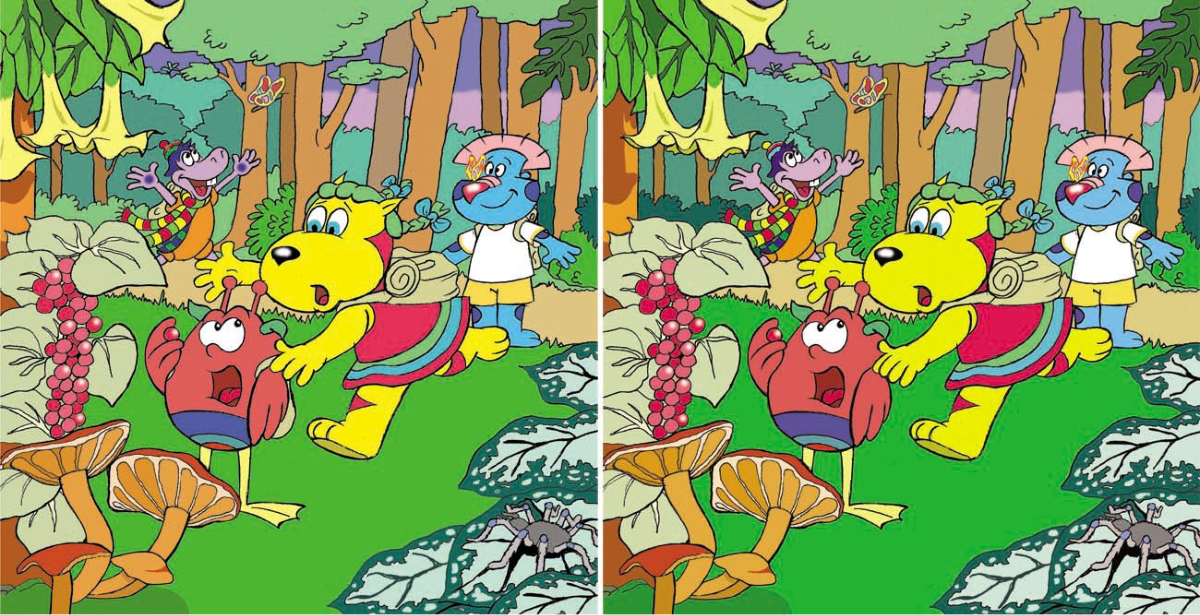

In [170]:
# [1]: Photo: View
#url = "https://upload.wikimedia.org/wikipedia/commons/f/f9/Globe_and_high_court_%28Spot_the_difference%29.jpg"

# [2]: Photo: Food
#url = "https://www.rd.com/wp-content/uploads/2017/10/10_Can-You-Spot-the-Difference-in-These-10-Pictures-_563610121-its_al_dente-1024x683.jpg"

# [3]: Cartoon: Mr. Beaver
#url = "https://www.rd.com/wp-content/uploads/2018/01/Can-You-Spot-the-10-Differences-in-This-Picture-_585659516-Ksenya-Savva.jpg"

# [4]: Simpsons
#url = "https://www.tellychakkar.com/sites/www.tellychakkar.com/files/images/fun_zone/spot_the_diff/2014/02/07/spot%20the%20diff%20900x580%20diff%20simpson%20family.jpg"

 #[5]: Drawing - Illustration for Kids
url = "https://raw.githubusercontent.com/Frichetten/Image-Difference-Finder/master/Image1.jpg"

# "N" for Normal Check ; "Y" for Rough Check
Rough_Check = "N" 

# "N" for Resuly Only ; "Y" for Visualizing Processes
Display_Images_Process="Y"

img = Image.open(BytesIO(requests.get(url).content))
img

# (2) image pre-process

In [171]:
img_ori = np.array(img)
width_img_ori = img_ori.shape[1]
hight_img_ori = img_ori.shape[0]
if Display_Images_Process=="Y":
    print("the image's size :",width_img_ori,"x",hight_img_ori)

the image's size : 1200 x 615


when X is between 598 ~ 602 , the pixels are white


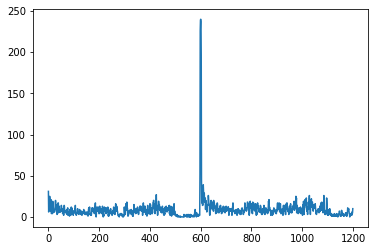

In [172]:
img_gray = cv.cvtColor(img_ori, cv.COLOR_RGB2GRAY)
V_Check=np.min(img_gray, axis=0)
if Display_Images_Process=="Y":
    plt.plot(V_Check)
W_X=[]
for i in range(img_gray.shape[1]):
    if V_Check[i] > 255*0.75:
        W_X.append(i)
if len(W_X) > 0:        
    print("when X is between", min(W_X), "~",max(W_X), ", the pixels are white")

left image's size: 598 x 615


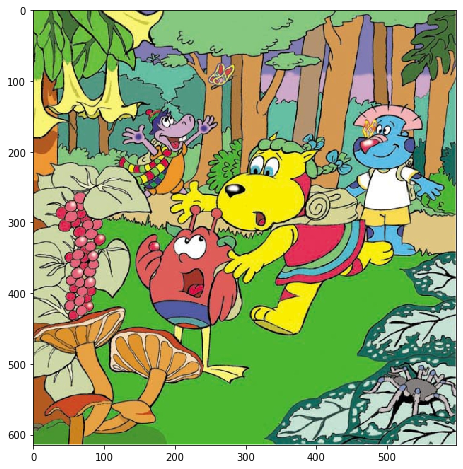

In [173]:
x_L = 0
y_L = 0

if len(W_X) > 0: 
    w_L = min(W_X)
else:
    w_L = int(width_img_ori / 2)
h_L = hight_img_ori

Left_Img_clear = img_ori[y_L : y_L + h_L, x_L : x_L + w_L]

if Display_Images_Process=="Y":
    print("left image's size:",Left_Img_clear.shape[1],"x",Left_Img_clear.shape[0])
    plt.figure(figsize = (8,8))
    plt.imshow(Left_Img_clear)

right image's size: 597 x 615


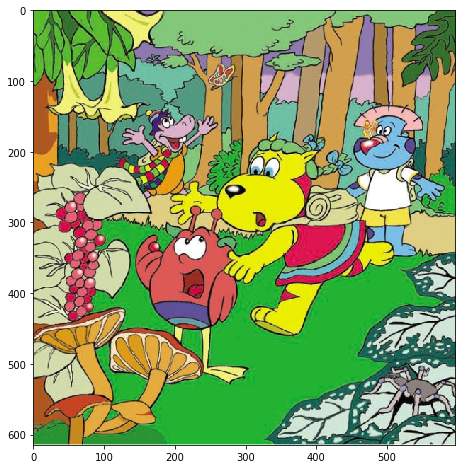

In [174]:
y_R = 0 
h_R = hight_img_ori 

if len(W_X) > 0:
    w_R = (width_img_ori - 1)-max(W_X)  
    x_R = max(W_X) + 1 
else:
    w_R = int(width_img_ori / 2)
    x_R = int(width_img_ori / 2)

Right_Img_clear = img_ori[y_R:y_R+h_R, x_R:x_R+w_R]

if Display_Images_Process=="Y":
    print("right image's size:",Right_Img_clear.shape[1],"x",Right_Img_clear.shape[0])
    plt.figure(figsize = (8,8))
    plt.imshow(Right_Img_clear)

In [175]:
w=min(w_R,w_L)
h=min(h_R,h_L)
Left_Img_Sized =cv.resize(Left_Img_clear,(w,h))
Right_Img_Sized =cv.resize(Right_Img_clear,(w,h))

# (3) image comparison

One-Side Check:


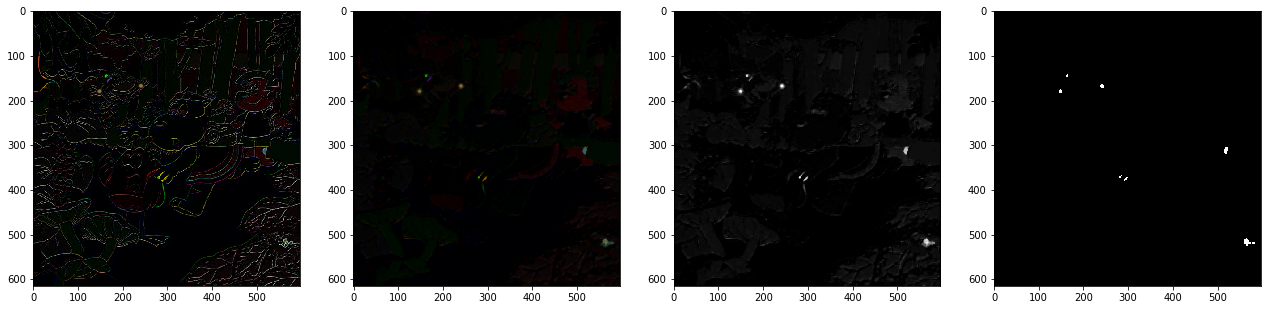

The-Other-Side Check:


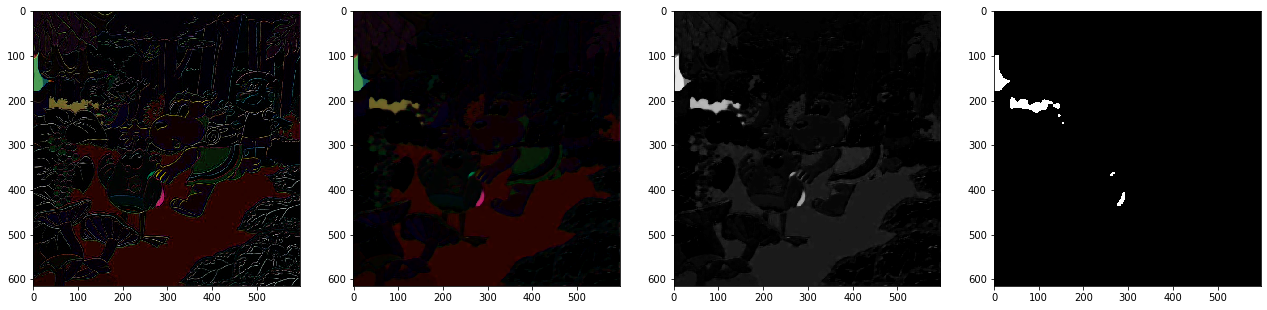

In [176]:
#RL
Diff_Img_RL = cv.subtract(Right_Img_Sized,Left_Img_Sized)
Diff_Img_RL_Blur=cv.medianBlur(Diff_Img_RL,7)
if len(img_ori.shape) == 3:
    Diff_Img_RL_Blur_Gray = cv.cvtColor(Diff_Img_RL_Blur, cv.COLOR_RGB2GRAY)
else:
    Diff_Img_RL_Blur_Gray = Diff_Img_RL_Blur
th, dst_RL = cv.threshold(Diff_Img_RL_Blur_Gray,255*0.2,255, cv.THRESH_BINARY)

if Display_Images_Process=="Y":
    fig=plt.figure(figsize=(22,22))

    columns = 4
    rows = 1
    print("One-Side Check:")
    for i in range(1,columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if i == 1:
            plt.imshow(Diff_Img_RL)
        elif i == 2:
            plt.imshow(Diff_Img_RL_Blur)
        elif i == 3: 
            plt.imshow(Diff_Img_RL_Blur_Gray,cmap='gray')
        elif i == 4:
            plt.imshow(dst_RL,cmap='gray')
    plt.show()

#LR    
Diff_Img_LR = cv.subtract(Left_Img_Sized,Right_Img_Sized)
Diff_Img_LR_Blur=cv.medianBlur(Diff_Img_LR,7)
if len(img_ori.shape) == 3:
    Diff_Img_LR_Blur_Gray = cv.cvtColor(Diff_Img_LR_Blur, cv.COLOR_RGB2GRAY)
else:
    Diff_Img_LR_Blur_Gray = Diff_Img_LR_Blur
th, dst_LR = cv.threshold(Diff_Img_LR_Blur_Gray,255*0.2,255, cv.THRESH_BINARY)


if Display_Images_Process=="Y":
    fig=plt.figure(figsize=(22,22))
    columns = 4
    rows = 1
    print("The-Other-Side Check:")    
    for i in range(1,columns*rows +1):
        fig.add_subplot(rows, columns, i)
        if i == 1:
            plt.imshow(Diff_Img_LR)
        elif i == 2:
            plt.imshow(Diff_Img_LR_Blur)
        elif i == 3: 
            plt.imshow(Diff_Img_LR_Blur_Gray,cmap='gray')
        elif i == 4:
            plt.imshow(dst_LR,cmap='gray')
    plt.show()    

Differences Summary:


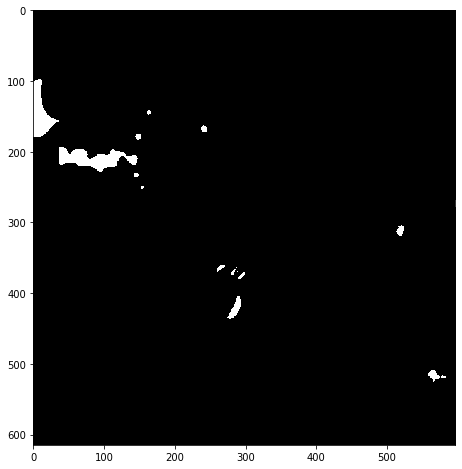

In [177]:
dst = cv.addWeighted(dst_LR, 1, dst_RL, 1, 0.0)
if Display_Images_Process=="Y":
    print("Differences Summary:")
    plt.figure(figsize = (8,8))
    plt.imshow(dst,cmap='gray')

In [178]:
contours, hierarchy = cv.findContours (dst, cv.RETR_LIST , cv.CHAIN_APPROX_SIMPLE)
if Display_Images_Process=="Y":
    print("found",len(contours),"contours")
if Rough_Check == "Y":
    contours_L=[]
    for i in range(len(contours)):
        if cv.contourArea(contours[i]) > (w*h /10000):
            contours_L.append(contours[i]) 
    if Display_Images_Process=="Y":
        print("found",len(contours_L),"larger contours")

found 16 contours


# (4) here you go~

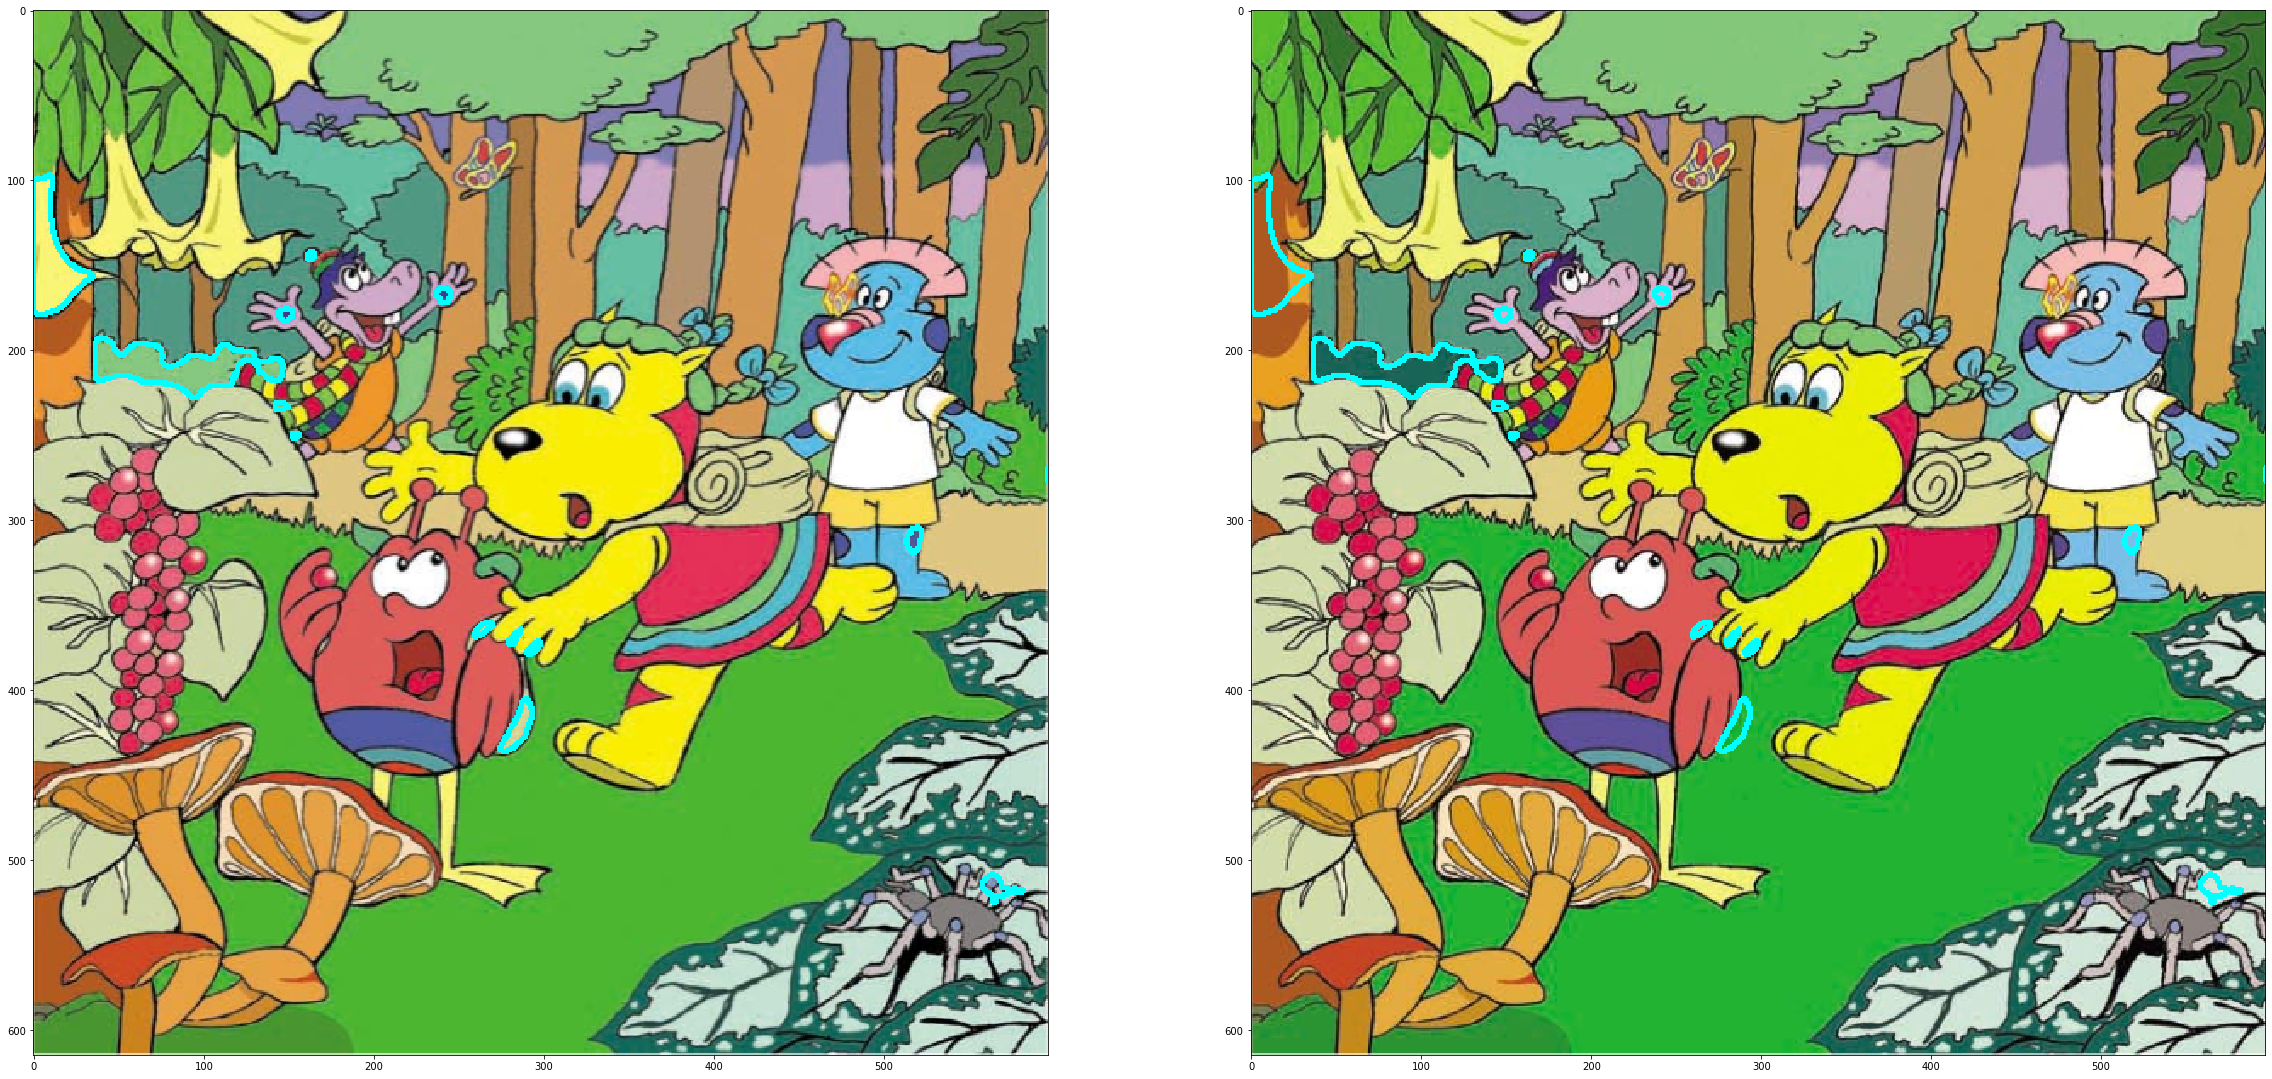

In [179]:
fig=plt.figure(figsize=(40, 40))

columns = 2
rows = 1

if Rough_Check == "Y":
    c = contours_L
else:
    c = contours


    
#print("HERE YOU GO:")    
for i in range(1,columns*rows +1):
    fig.add_subplot(rows, columns, i)      
    if i == 1:
        plt.imshow(cv.drawContours(Left_Img_Sized,c,-1,(0,255,255),2)) 
    else: 
        plt.imshow(cv.drawContours(Right_Img_Sized,c,-1,(0,255,255),2))
plt.show()        

In [180]:
#img